# Importing the Libraries

In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, ReLU
from keras import regularizers, optimizers
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import layers
from keras.metrics import categorical_crossentropy
from tensorflow.keras import Model, Input
from tensorflow.keras import utils
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Loading and Preprocessing the Data


In [2]:
%cp /content/drive/MyDrive/Dataset/ -r /content/

In [3]:
train = tf.keras.utils.image_dataset_from_directory(
    '/content/Dataset/Train',
    labels='inferred' ,
    label_mode = 'categorical',
    color_mode="grayscale",
    image_size=(64, 64),
    shuffle=True,
    batch_size=128,
    seed= 10,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

val = tf.keras.utils.image_dataset_from_directory(
    '/content/Dataset/Val',
    labels='inferred' ,
    label_mode = 'categorical',
    color_mode="grayscale",
    image_size=(64, 64),
    shuffle=False,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

test = tf.keras.utils.image_dataset_from_directory(
    '/content/Dataset/Test',
    labels='inferred' ,
    label_mode = 'categorical',
    color_mode="grayscale",
    image_size=(64, 64),
    shuffle=False,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 5908 files belonging to 4 classes.
Found 855 files belonging to 4 classes.
Found 825 files belonging to 4 classes.


In [4]:
aug = layers.Rescaling(1./255)

train = train.map(lambda x, y: (aug(x), y))
val = val.map(lambda x, y: (aug(x), y)) 
test = test.map(lambda x, y: (aug(x), y)) 

In [5]:
y_test = np.concatenate([y for x, y in val], axis=0)
x_test = np.concatenate([x for x, y in val], axis=0)

# Implementing the Network and Training it

In [6]:
model = tf.keras.models.Sequential()
model.add(Input((64,64,1)))
model.add(Flatten())
model.add(Dense(units=128, kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.2))
model.add(Dense(units=128, kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dropout(0.2))
model.add(Dense(units=256, kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Dense(4, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               524416    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                        

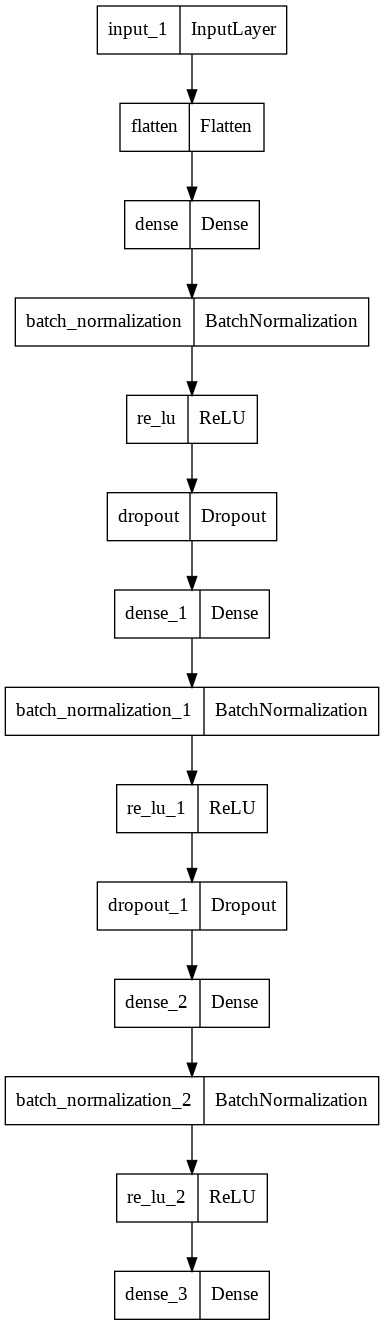

In [ ]:
tf.keras.utils.plot_model(model)

In [8]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss=['categorical_crossentropy'], metrics=['accuracy'])

In [9]:
history = model.fit(train, validation_data=val, epochs=20, verbose=1)

Epoch 1/20
47/47 [==============================] - 8s 93ms/step - loss: 1.4657 - accuracy: 0.3226 - val_loss: 1.5225 - val_accuracy: 0.2538
Epoch 2/20
47/47 [==============================] - 5s 93ms/step - loss: 1.2066 - accuracy: 0.4509 - val_loss: 1.5674 - val_accuracy: 0.2538
Epoch 3/20
47/47 [==============================] - 5s 94ms/step - loss: 1.0634 - accuracy: 0.5442 - val_loss: 1.5326 - val_accuracy: 0.2632
Epoch 4/20
47/47 [==============================] - 5s 96ms/step - loss: 0.9403 - accuracy: 0.6288 - val_loss: 1.5518 - val_accuracy: 0.2982
Epoch 5/20
47/47 [==============================] - 5s 92ms/step - loss: 0.8530 - accuracy: 0.6806 - val_loss: 1.5035 - val_accuracy: 0.3041
Epoch 6/20
47/47 [==============================] - 5s 93ms/step - loss: 0.7852 - accuracy: 0.7238 - val_loss: 1.3031 - val_accuracy: 0.3684
Epoch 7/20
47/47 [==============================] - 5s 93ms/step - loss: 0.7103 - accuracy: 0.7630 - val_loss: 1.1550 - val_accuracy: 0.5380
Epoch 8/20
47

# Evaluation

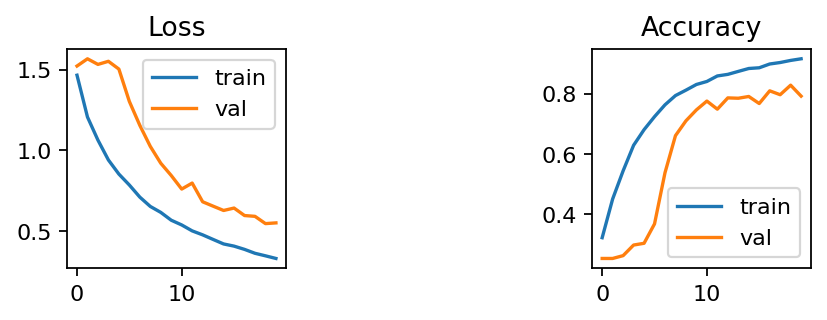

In [10]:
plt.figure( dpi=160)

plt.subplot(231)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

plt.subplot(233)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()

plt.show()

In [11]:
y_hat = model.predict(x_test)

27/27 [==============================] - 0s 2ms/step


In [12]:
y_hat[y_hat>=0.5] = 1
y_hat[y_hat<0.5] = 0


For Test Set
F1 score:  0.8014660965180207
Accuracy:  0.7672514619883041
Precision:  0.8388746803069054
Recall:  0.7672514619883041
Confusion Matrix: 



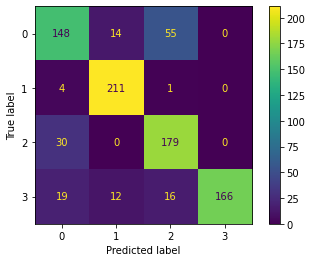

In [13]:
print('\nFor Test Set')
f1 = f1_score(y_test, y_hat, average='micro')
print('F1 score: ' , f1)

accuracy = accuracy_score(y_test, y_hat)
print('Accuracy: ' , accuracy)

precision = precision_score(y_test, y_hat, average='micro')
print('Precision: ' , precision)

recall = recall_score(y_test, y_hat, average='micro')
print('Recall: ' , recall)

matrix = ConfusionMatrixDisplay(confusion_matrix(y_test.argmax(axis=1), y_hat.argmax(axis=1)))
print('Confusion Matrix: \n')
matrix.plot()
plt.show()